<a href="https://colab.research.google.com/github/Ap00rv-1/ApoorvSSE/blob/main/CynapticsInduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import random
import tensorflow as tf
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [2]:
input_path = []
label = []

for class_name in os.listdir("Data"):
    for path in os.listdir("Data/"+class_name):
        if class_name == 'AI_Images':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("Data", class_name, path))
print(input_path[1100], label[1100])

Data/AI_Images/image_406.jpg 0


In [3]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0   Data/Real_Images/image_62.jpg      1
1   Data/Real_Images/image_63.jpg      1
2  Data/Real_Images/image_515.jpg      1
3    Data/AI_Images/image_568.jpg      0
4  Data/Real_Images/image_552.jpg      1

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

In [6]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

[]

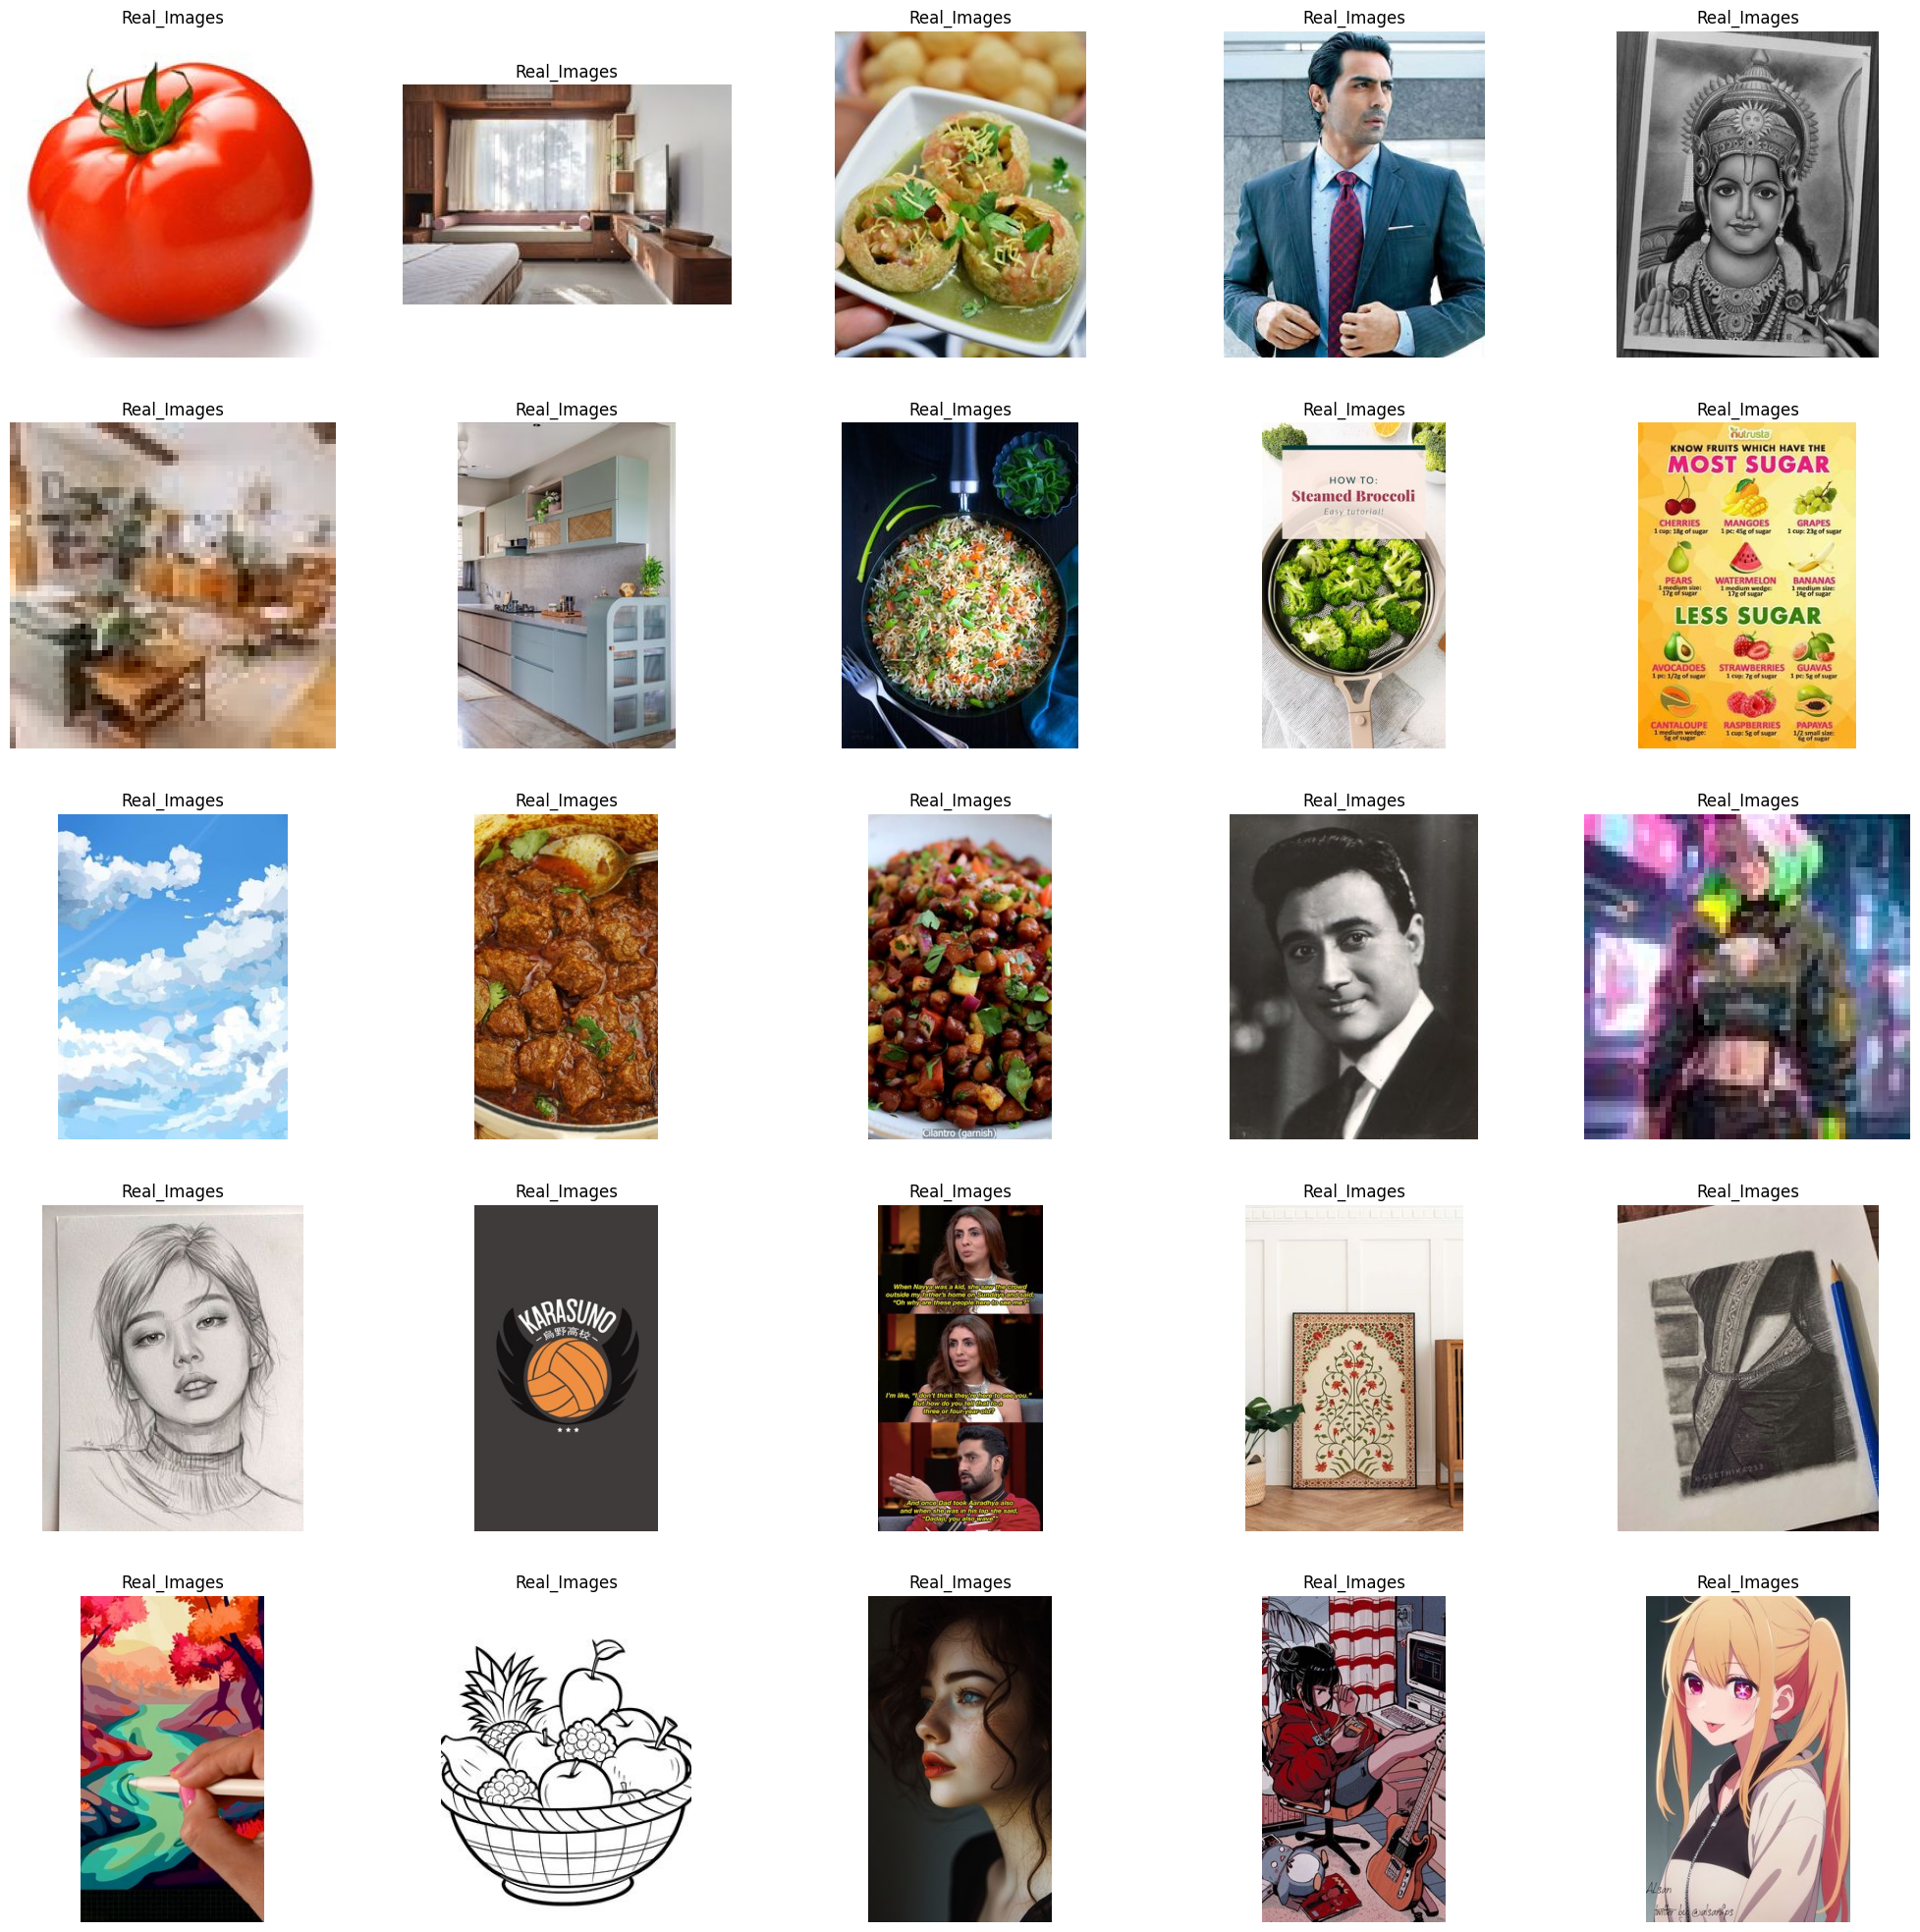

In [7]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Real_Images')
    plt.axis('off')

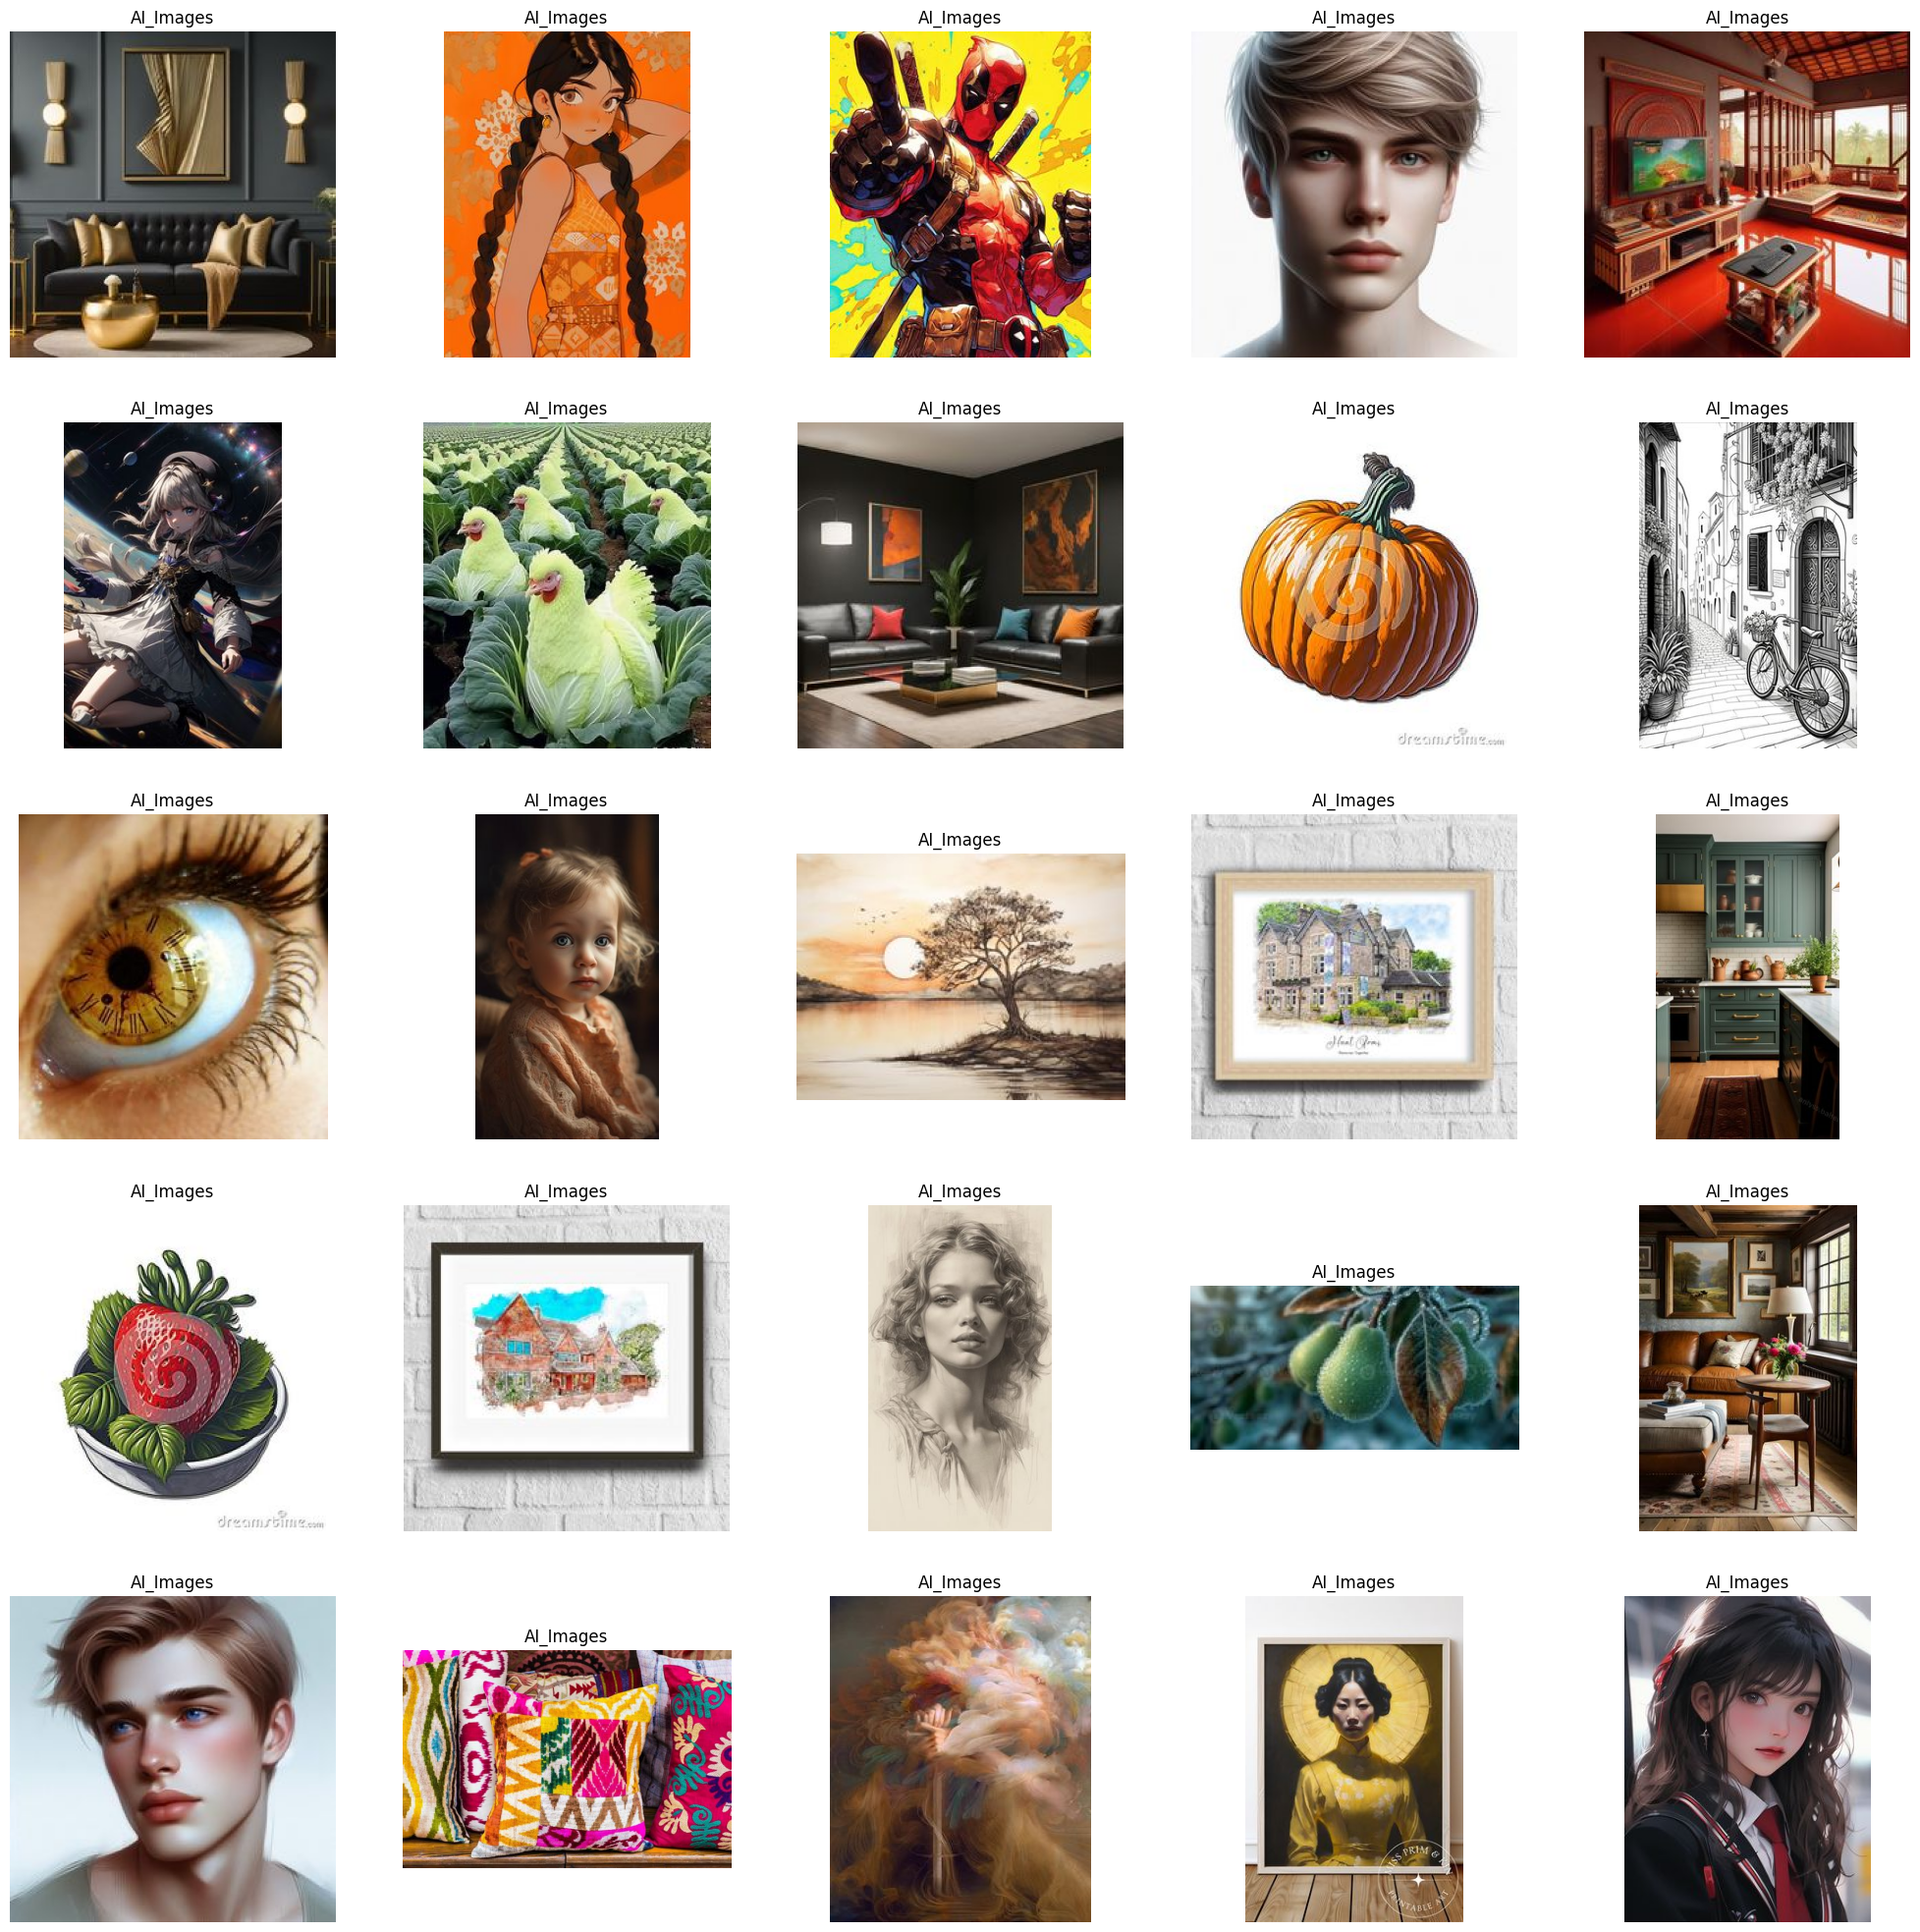

In [8]:
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('AI_Images')
    plt.axis('off')

In [9]:
df['label'] = df['label'].astype('str')

In [10]:
df.head()

images label
0   Data/Real_Images/image_62.jpg     1
1   Data/Real_Images/image_63.jpg     1
2  Data/Real_Images/image_515.jpg     1
3    Data/AI_Images/image_568.jpg     0
4  Data/Real_Images/image_552.jpg     1

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 1004 validated image filenames belonging to 2 classes.
Found 251 validated image filenames belonging to 2 classes.


In [13]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [15]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
2/2 [==============================] - 31s 13s/step - loss: 1.1425 - accuracy: 0.5040 - val_loss: 2.7090 - val_accuracy: 0.4821
Epoch 2/10
2/2 [==============================] - 30s 14s/step - loss: 2.1174 - accuracy: 0.4771 - val_loss: 0.8822 - val_accuracy: 0.4821
Epoch 3/10
2/2 [==============================] - 27s 12s/step - loss: 0.7602 - accuracy: 0.4980 - val_loss: 0.7238 - val_accuracy: 0.5179
Epoch 4/10
2/2 [==============================] - 29s 13s/step - loss: 0.7385 - accuracy: 0.5229 - val_loss: 0.7448 - val_accuracy: 0.5179
Epoch 5/10
2/2 [==============================] - 28s 13s/step - loss: 0.7370 - accuracy: 0.5229 - val_loss: 0.7090 - val_accuracy: 0.5179
Epoch 6/10
2/2 [==============================] - 28s 13s/step - loss: 0.7054 - accuracy: 0.5229 - val_loss: 0.6938 - val_accuracy: 0.5179
Epoch 7/10
2/2 [==============================] - 26s 10s/step - loss: 0.6926 - accuracy: 0.5229 - val_loss: 0.6913 - val_accuracy: 0.5179
Epoch 8/10
2/2 [===========

In [16]:
images_test = []
labels = []
for test in os.listdir("Test_Images"):
  image_path = "Test_Images/"+test # path of the image
  img = load_img(image_path, target_size=(128, 128))
  img = np.array(img)
  img = img / 255.0 # normalize the image
  img = img.reshape(1, 128, 128, 3) # reshape for prediction
  pred = model.predict(img)
  images_test.append(test.replace(".jpg"," "))
  if pred[0] > 0.5:
    label = 'Real'
    labels.append(label)
  else:
    label = 'AI'
    labels.append(label)
  # print(test)
  print(label)

1/1 [==============================] - 0s 144ms/step
AI
1/1 [==============================] - 0s 30ms/step
AI
1/1 [==============================] - 0s 34ms/step
AI
1/1 [==============================] - 0s 35ms/step
AI
1/1 [==============================] - 0s 32ms/step
AI
1/1 [==============================] - 0s 32ms/step
AI
1/1 [==============================] - 0s 33ms/step
AI
1/1 [==============================] - 0s 34ms/step
AI
1/1 [==============================] - 0s 41ms/step
AI
1/1 [==============================] - 0s 34ms/step
AI
1/1 [==============================] - 0s 37ms/step
AI
1/1 [==============================] - 0s 38ms/step
AI
1/1 [==============================] - 0s 35ms/step
AI
1/1 [==============================] - 0s 37ms/step
AI
1/1 [==============================] - 0s 40ms/step
AI
1/1 [==============================] - 0s 35ms/step
AI
1/1 [==============================] - 0s 41ms/step
AI
1/1 [==============================] - 0s 36ms/step
AI
1/1 [====

In [17]:
test_df = pd.DataFrame()
test_df["Id"] = images_test
test_df["label"] = labels
test_df = test_df.sample(frac=1).reset_index(drop=True)
test_df.head()

Id label
0  image_337     AI
1   image_17     AI
2  image_378     AI
3  image_397     AI
4  image_206     AI

In [20]:
test_df.to_csv('Submission.csv', index = False)